In [ ]:
!pip install qiskit
!pip install pylatexenc

In [2]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, Operator
from qiskit.visualization import plot_histogram

In [28]:
# function for plotting the quantum circuit
def qplot(x):
  return x.draw('mpl', style= 'iqx', initial_state = True, scale = 0.7)

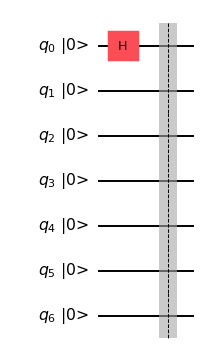

In [36]:
n = 7
qc = QuantumCircuit(n) # Build a quantum circuit with 4 qubit

qc.h(0) # Apply a Hadamard gate to the first qubit
qc.barrier()
qplot(qc)

## Building a control Hadamard Gate

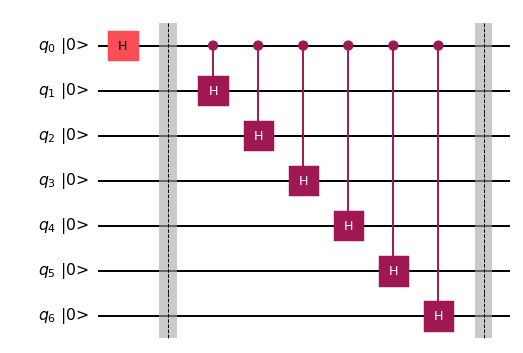

In [37]:
# we need to import Hadamard gate from qiskit.circuit.library
from qiskit.circuit.library import HGate

c_h = HGate().control(1) # Controlled Hadamard gate, 1 is number of control we want to use
for i in range(1,n):
  qc.append(c_h,[0,i])

qc.barrier()
qplot(qc)

## Applying More Control-Qubit

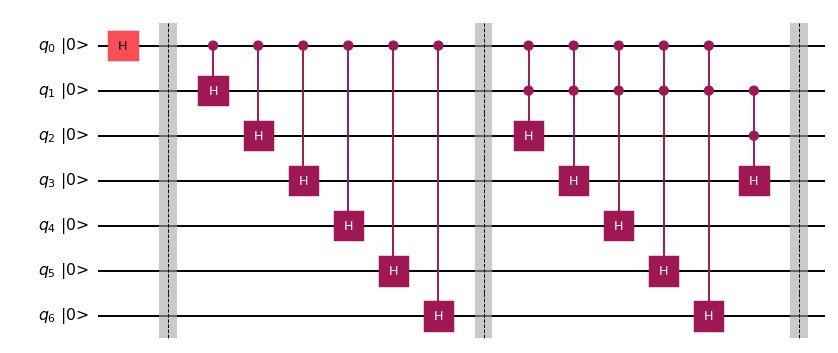

In [38]:
c_h2 = HGate().control(2) # Controlled Hadamard gate, controlled Hadamard gate with two control gate

for i in range(2,n):
  qc.append(c_h2,[0,1,i])

qc. append(c_h2,[1,2,3])
qc.barrier()

qplot(qc)

## Other Useful Method

One of the useful way of using this method is building a circuit for doing our desired operation and then adding a control gate to it.

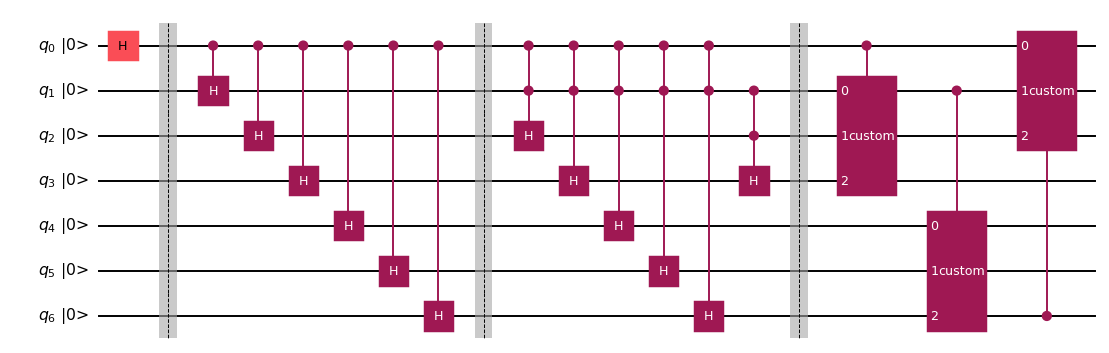

In [39]:
# build a simple circuit
circ = QuantumCircuit(3, name = "custom")
circ.h(range(3))
circ.x(0)
circ.cx(1,2)
custom = circ.to_gate().control(1)

qc.append(custom, [0,1,2,3])
qc.append(custom, [1,4,5,6])
qc.append(custom, [6,0,1,2])

qplot(qc)

We can also add more control qubit for custom gate

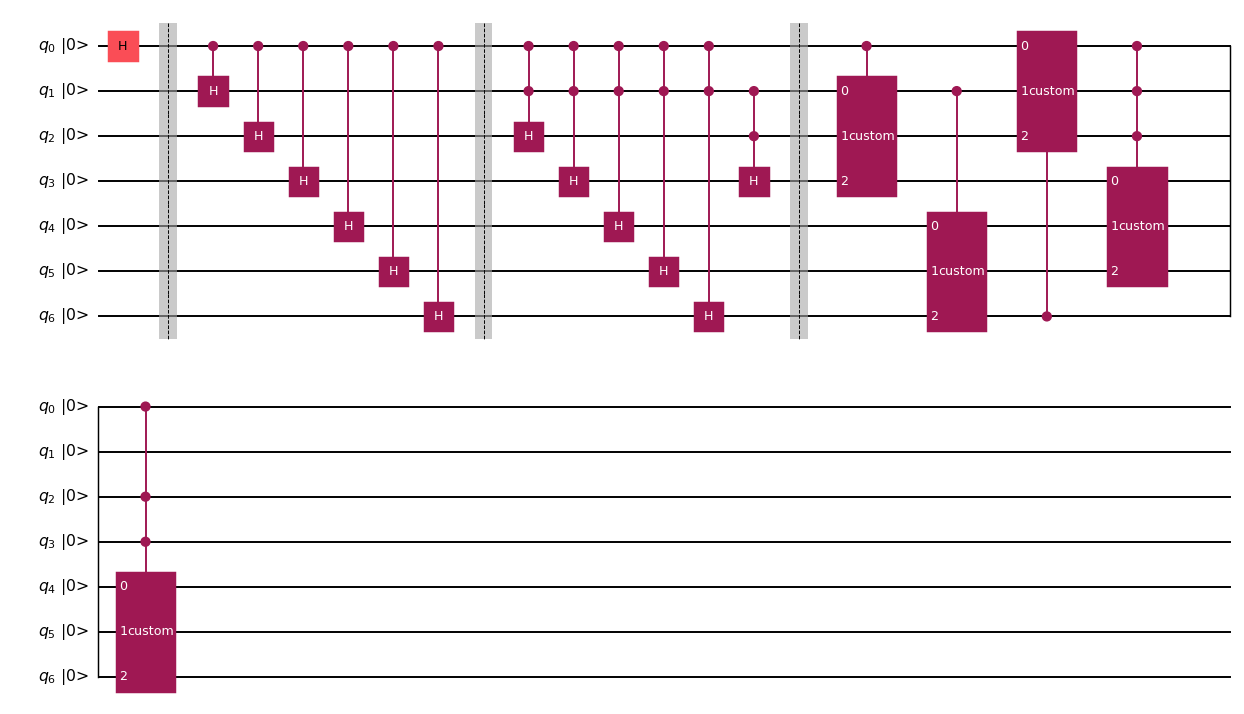

In [40]:
custom3 = circ.to_gate().control(3)

qc.append(custom3, [0,1,2,3,4,5])
qc.append(custom3, [0,2,3,4,5,6])


qplot(qc)